### Recommending the Right Products

we are going to dive deeper into building product recommendation systems with which we can target customers better, using product recommendations that are custom-tailored toward individual customers. Studies have shown that personalized product recommendations improve conversion rates and customer retention rates

According to a study conducted by Salesforce, those customers who are prompted with personalized product recommendations drive 24% of the orders and 26% of the revenue.

##### Product recommender system
A product recommender system is a system with the goal of predicting and compiling a list of items that a customer is likely to purchase

Various business use cases:
- music streaming service
- e-commerce company, Amazon, utilizes recommendater systems to predict and show a list of products that a customer is likely to purchase
- media service provider, Netflix, uses recommender systems to recommend movies or TV shows for individual users that they are likely to watch

The usage of a recommender system does not stop here. It can also be used to recommend related articles, news, or books to users

**There are typically two ways to produce a list of recommendations:**

- Collaborative filtering 
- Content-based filtering

###### Collaborative filtering
The collaborative filtering method is based on previous user behaviors, such as pages that they viewed, products that they purchased, or ratings that they have given to different items.
**We will learn how to collaborative filtering during this class**

The basic **assumption** behind the collaborative filtering method is that those who have viewed or purchased similar contents or products in the past are likely to view or purchase similar kinds of contents or products in the future

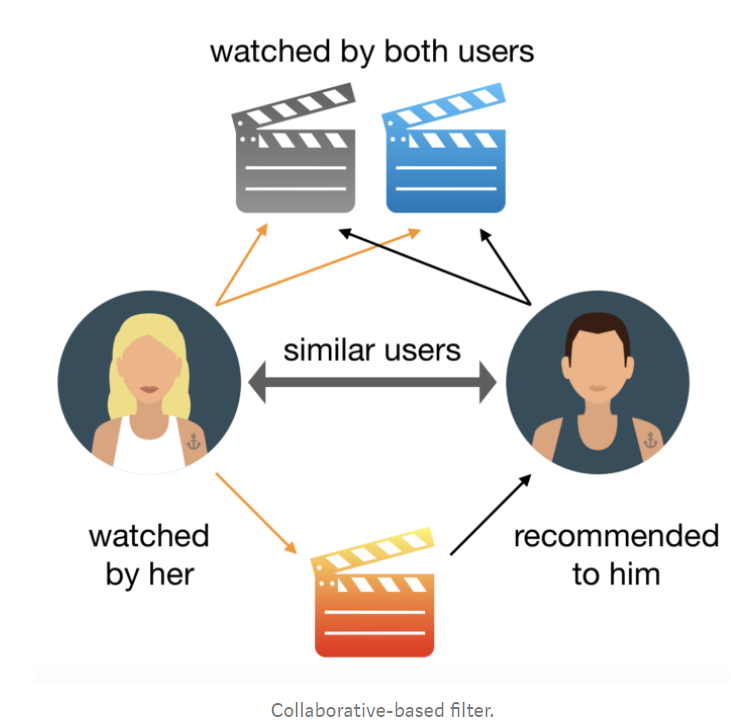

###### Content-based filtering
Content-based filtering, on the other hand, produces a list of recommendations based on the characteristics of an item or a user

The basic **assumption** behind the content-based filtering method is that the users are likely to view or purchase items that are similar to those items that they have bought or viewed in the past. For example, if a user has listened to some songs in the past, then the content-based filtering method will recommend similar kinds of songs that share similar characteristics to those songs that the user has already listened to. 

The content-based recommendation engine will only recommend articles related to these categories and may never recommend anything in other categories as the user never viewed those articles before. This problem can be solved using another variant of recommendation algorithm known as Collaborative Filtering.

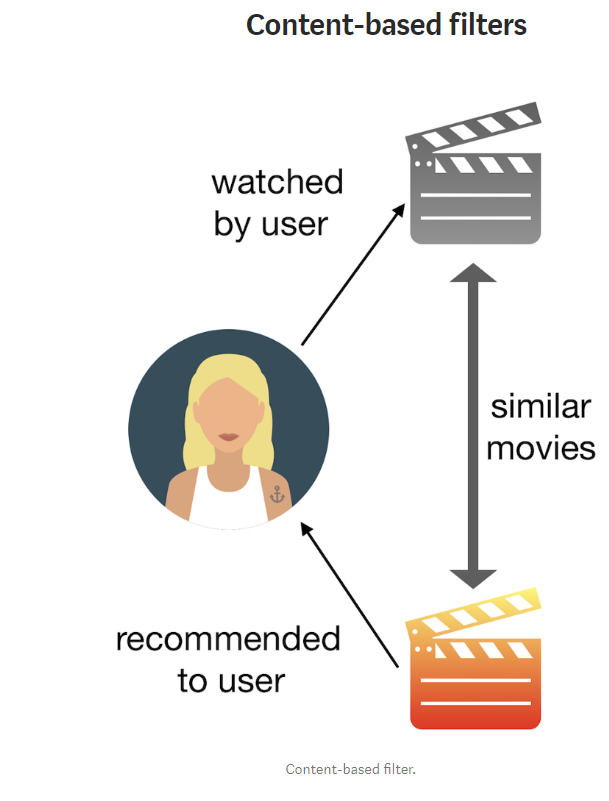

###### user-to-item matrix
The first step to implementing a collaborative filtering algorithm for a product recommendation system is building a user-to-item matrix. A user-to-item matrix comprises individual users in the rows and individual items in the columns:

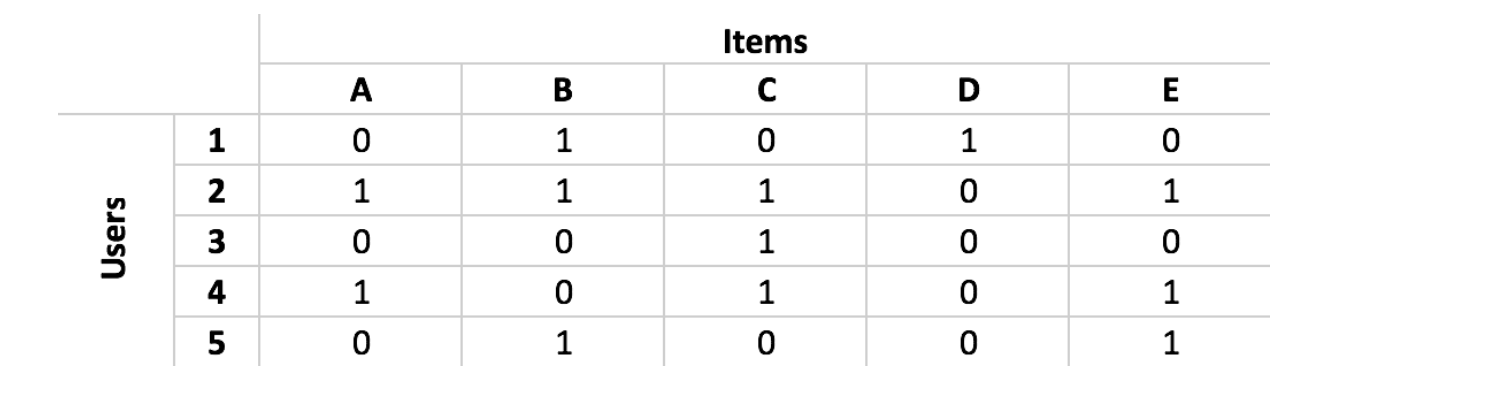

The rows in this matrix represent each user and the columns represent each item. The values in each cell represent whether the given user bought the given item or not

With this user-to-item matrix, the next step to building a collaborative filtering-based product recommender system is to compute similarities between users. To measure the similarities, **cosine similarity** is frequently used. The equation for computing the cosine similarity between two users looks as follows:

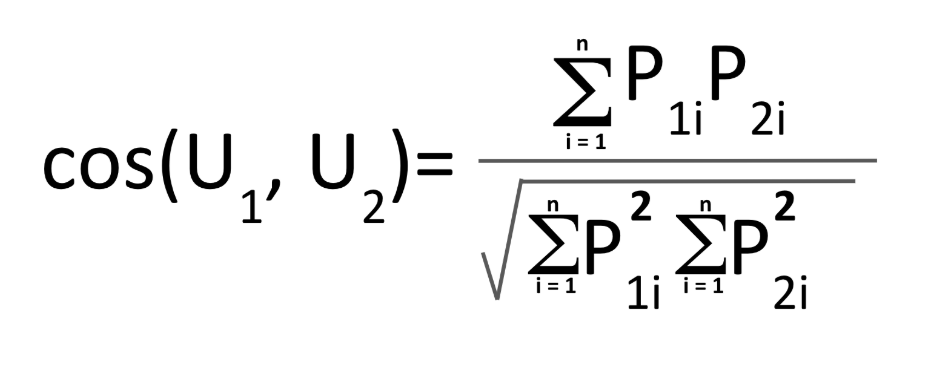

In this equation, U1 and U2 represent user 1 and user 2. P1i and P2i represent each product, i, that user 1 and user 2 have bought

###### user-based approach vs. item-based approach

When using a collaborative filtering algorithm for product recommendations, there are two approaches that you can take—a user-based approach and an item-based approach.

The user-based approach to collaborative filtering uses the similarities between users. On the other hand, the item-based approach collaborative filtering uses the similarities between items.
For the item-based approach, we need to calculate similarities between the two items, and this means that we need to build and use an item-to-user matrix, which we can get by simply transposing the user-to-item matrix.
One key advantage of Item-based is the stability which is that the ratings on a given item will not change significantly overtime, unlike the tastes of human beings.

In [1]:
# Building a product recommendation algorithm with Python

import pandas as pd

df = pd.read_excel(io='Online Retail.xlsx', sheet_name='Online Retail')
df = df.loc[df['Quantity'] > 0]

In [2]:
# Step one: handle NaN values in our dataset

In [3]:
df['CustomerID'].isnull().sum()

133361

In [4]:
df[df['CustomerID'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom


In [5]:
# drop NA
df = df.dropna(subset=['CustomerID'])
# dropna function in the pandas package removes records with missing values from a given DataFrame

In [6]:
# Step two: Building a customer-item matrix:
# transform the data into a customer-item matrix, where each row represents a customer and the columns correspond to different products
customer_item_matrix = df.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)
customer_item_matrix
#we now have a matrix where each row represents the total quantities bought for each product for each customer

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12348.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0
12349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12350.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
12352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,7.0
12353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12355.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# let's 0-1 encode this data, so that the value of 1 means that the given product was purchased by the given customer, 
# and the value of 0 means that the given product was never purchased by the given customer
customer_item_matrix = customer_item_matrix.applymap(lambda x: 1 if x > 0 else 0)
customer_item_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12352.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
12353.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12354.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12355.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# User-based collaborative filtering and recommendations
from sklearn.metrics.pairwise import cosine_similarity
user_user_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix)
)
# This function computes pairwise cosine similarities between the samples and outputs the results as an array type.
user_user_sim_matrix
#Then, we create a pandas DataFrame with this output array and store it into a variable named user_user_sim_matrix, 
# which stands for user-to-user similarity matrix.

,0,1,2,3,4,5,6,7,8,9,...,4329,4330,4331,4332,4333,4334,4335,4336,4337,4338
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.063022,0.046130,0.047795,0.038484,0.000000,0.025876,0.136641,0.094742,...,0.000000,0.029709,0.052668,0.000000,0.032844,0.062318,0.000000,0.113776,0.109364,0.012828
2,0.000000,0.063022,1.000000,0.024953,0.051709,0.027756,0.000000,0.027995,0.118262,0.146427,...,0.000000,0.064282,0.113961,0.000000,0.000000,0.000000,0.000000,0.000000,0.170905,0.083269
3,0.000000,0.046130,0.024953,1.000000,0.056773,0.137137,0.000000,0.030737,0.032461,0.144692,...,0.000000,0.105868,0.000000,0.000000,0.039014,0.000000,0.000000,0.067574,0.137124,0.030475
4,0.000000,0.047795,0.051709,0.056773,1.000000,0.031575,0.000000,0.000000,0.000000,0.033315,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.044866,0.000000
5,0.000000,0.038484,0.027756,0.137137,0.031575,1.000000,0.000000,0.102568,0.036108,0.089414,...,0.000000,0.157014,0.000000,0.000000,0.000000,0.000000,0.000000,0.037582,0.080278,0.033898
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.138675,0.068680,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.025876,0.027995,0.030737,0.000000,0.102568,0.000000,1.000000,0.000000,0.054109,...,0.000000,0.039590,0.000000,0.000000,0.000000,0.041523,0.049629,0.000000,0.113354,0.000000
8,0.000000,0.136641,0.118262,0.032461,0.000000,0.036108,0.138675,0.000000,1.000000,0.152388,...,0.000000,0.083624,0.148250,0.000000,0.000000,0.000000,0.000000,0.160128,0.034204,0.108324
9,0.000000,0.094742,0.146427,0.144692,0.033315,0.089414,0.068680,0.054109,0.152388,1.000000,...,0.000000,0.082832,0.000000,0.000000,0.000000,0.000000,0.000000,0.079305,0.093170,0.000000


In [9]:
# Since each column and each row index stand for individual customers, we are going to rename the index and columns
user_user_sim_matrix.columns = customer_item_matrix.index

user_user_sim_matrix['CustomerID'] = customer_item_matrix.index
user_user_sim_matrix = user_user_sim_matrix.set_index('CustomerID')
user_user_sim_matrix.head()
# Let's take a closer look at this user-to-user similarity matrix:
# the cosine similarity measure between customers 12347 and 12348 is 0.063022. 
# On the other hand, the cosine similarity between customers 12347 and 12349 is 0.046130. 
# This suggests that customer 12348 is more similar to customer 12347 than customer 12349 is to the customer 12347,

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.063022,0.046130,0.047795,0.038484,0.0,0.025876,0.136641,0.094742,...,0.0,0.029709,0.052668,0.0,0.032844,0.062318,0.0,0.113776,0.109364,0.012828
12348.0,0.0,0.063022,1.000000,0.024953,0.051709,0.027756,0.0,0.027995,0.118262,0.146427,...,0.0,0.064282,0.113961,0.0,0.000000,0.000000,0.0,0.000000,0.170905,0.083269
12349.0,0.0,0.046130,0.024953,1.000000,0.056773,0.137137,0.0,0.030737,0.032461,0.144692,...,0.0,0.105868,0.000000,0.0,0.039014,0.000000,0.0,0.067574,0.137124,0.030475
12350.0,0.0,0.047795,0.051709,0.056773,1.000000,0.031575,0.0,0.000000,0.000000,0.033315,...,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.044866,0.000000


In [10]:
# These pairwise cosine similarity measures are what we are going to use for product recommendations.
# Let's work by picking one customer as an example
user_user_sim_matrix.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
17935.0    0.183340
12414.0    0.181902
12652.0    0.175035
16692.0    0.171499
16754.0    0.171499
12814.0    0.171499
12791.0    0.171499
16426.0    0.166968
16333.0    0.161690
12475.0    0.161690
12735.0    0.157378
12449.0    0.156290
12684.0    0.155268
17486.0    0.148522
16846.0    0.146254
12394.0    0.142695
12603.0    0.140028
12665.0    0.140028
17788.0    0.140028
15435.0    0.135113
12797.0    0.134535
14624.0    0.134535
12613.0    0.130682
12497.0    0.129641
12645.0    0.127386
12628.0    0.124784
16247.0    0.121268
12817.0    0.121268
12789.0    0.121268
             ...   
15898.0    0.000000
15945.0    0.000000
15948.0    0.000000
16006.0    0.000000
15978.0    0.000000
16003.0    0.000000
16000.0    0.000000
15996.0    0.000000
15994.0    0.000000
15992.0    0.000000
15988.0    0.000000
15987.0    0.000000
15986.0    0.000000
15985.0    0.000000
15981.0    0.000000
15980.0    0.000000
15977.0    0.000000
15949.0    0.000000
15975.0  

Let's pick customer 17935 and discuss how we can recommend products using these results. The strategy is as follows. First, we need to identify the items that the customers 12350 and 17935 have already bought. Then, we are going to find the products that the target customer 17935 has not purchased, but customer 12350 has. 
Since these two customers have bought similar items in the past, we are going to assume that the target customer 17935 has a high chance of purchasing the items that he or she has not bought, but customer 12350 has bought. Lastly, we are going to use this list of items and recommend them to the target customer 17935.

In [11]:
# Let's first take a look at how we can retrieve the items that the customer 12350 has purchased in the past
items_bought_by_A = set(customer_item_matrix.loc[12350.0].iloc[
    customer_item_matrix.loc[12350.0].nonzero()].index) 
items_bought_by_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [12]:
# apply the same code for the target customer 17935
items_bought_by_B = set(customer_item_matrix.loc[17935.0].iloc[
    customer_item_matrix.loc[17935.0].nonzero()
].index)
items_bought_by_B

{20657,
 20659,
 20828,
 20856,
 21051,
 21866,
 21867,
 22208,
 22209,
 22210,
 22211,
 22449,
 22450,
 22551,
 22553,
 22557,
 22640,
 22659,
 22749,
 22752,
 22753,
 22754,
 22755,
 23290,
 23292,
 23309,
 '85099B',
 'POST'}

In [13]:
# Using a simple set operation, we can find the items that customer 12350 has bought, but customer 17935 has not
items_to_recommend_to_B = items_bought_by_A - items_bought_by_B
items_to_recommend_to_B

{20615,
 20652,
 21171,
 21832,
 21864,
 21908,
 21915,
 22348,
 22412,
 22620,
 '79066K',
 '79191C',
 '84086C'}

In [14]:
# get the descriptions of these items
df.loc[
    df['StockCode'].isin(items_to_recommend_to_B), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode')

,Description
StockCode,
21832,CHOCOLATE CALCULATOR
21915,RED HARMONICA IN BOX
22620,4 TRADITIONAL SPINNING TOPS
79066K,RETRO MOD TRAY
21864,UNION JACK FLAG PASSPORT COVER
79191C,RETRO PLASTIC ELEPHANT TRAY
21908,CHOCOLATE THIS WAY METAL SIGN
20615,BLUE POLKADOT PASSPORT COVER
20652,BLUE POLKADOT LUGGAGE TAG


In [15]:
# Item-based collaborative filtering and recommendations

item_item_sim_matrix = pd.DataFrame(
    cosine_similarity(customer_item_matrix.T) # don't forget to transpose
)
item_item_sim_matrix

,0,1,2,3,4,5,6,7,8,9,...,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664
0,1.000000,0.000000,0.094868,0.090351,0.062932,0.098907,0.095346,0.047673,0.075593,0.090815,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029361,0.000000,0.066915,0.000000,0.078217
1,0.000000,1.000000,0.000000,0.032774,0.045655,0.047836,0.000000,0.000000,0.082261,0.049413,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016182,0.000000,0.000000
2,0.094868,0.000000,1.000000,0.057143,0.059702,0.041703,0.060302,0.060302,0.095618,0.028718,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070535,0.000000,0.010993
3,0.090351,0.032774,0.057143,1.000000,0.042644,0.044682,0.043073,0.000000,0.051224,0.030770,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070535,0.000000,0.070669
4,0.062932,0.045655,0.059702,0.042644,1.000000,0.280097,0.045002,0.060003,0.071358,0.057152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.036955,0.000000,0.070185,0.049752,0.021877
5,0.098907,0.047836,0.041703,0.044682,0.280097,1.000000,0.094304,0.062869,0.074767,0.044911,...,0.073721,0.000000,0.060193,0.000000,0.032969,0.019360,0.104257,0.066184,0.000000,0.034383
6,0.095346,0.000000,0.060302,0.043073,0.045002,0.094304,1.000000,0.045455,0.072075,0.075765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.055989,0.150756,0.106335,0.000000,0.058004
7,0.047673,0.000000,0.060302,0.000000,0.060003,0.062869,0.045455,1.000000,0.108112,0.129884,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063801,0.000000,0.016573
8,0.075593,0.082261,0.095618,0.051224,0.071358,0.074767,0.072075,0.108112,1.000000,0.231694,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059013,0.000000,0.026278
9,0.090815,0.049413,0.028718,0.030770,0.057152,0.044911,0.075765,0.129884,0.231694,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.022704,0.039996,0.000000,0.086089,0.000000,0.051301


In [16]:
item_item_sim_matrix.columns = customer_item_matrix.T.index

item_item_sim_matrix['StockCode'] = customer_item_matrix.T.index
item_item_sim_matrix = item_item_sim_matrix.set_index('StockCode')
item_item_sim_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.090351,0.062932,0.098907,0.095346,0.047673,0.075593,0.090815,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.029361,0.000000,0.066915,0.000000,0.078217
10080,0.000000,1.000000,0.000000,0.032774,0.045655,0.047836,0.000000,0.000000,0.082261,0.049413,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.016182,0.000000,0.000000
10120,0.094868,0.000000,1.000000,0.057143,0.059702,0.041703,0.060302,0.060302,0.095618,0.028718,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070535,0.000000,0.010993
10125,0.090351,0.032774,0.057143,1.000000,0.042644,0.044682,0.043073,0.000000,0.051224,0.030770,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.070535,0.000000,0.070669
10133,0.062932,0.045655,0.059702,0.042644,1.000000,0.280097,0.045002,0.060003,0.071358,0.057152,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.036955,0.000000,0.070185,0.049752,0.021877
10135,0.098907,0.047836,0.041703,0.044682,0.280097,1.000000,0.094304,0.062869,0.074767,0.044911,...,0.073721,0.000000,0.060193,0.000000,0.032969,0.019360,0.104257,0.066184,0.000000,0.034383
11001,0.095346,0.000000,0.060302,0.043073,0.045002,0.094304,1.000000,0.045455,0.072075,0.075765,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.055989,0.150756,0.106335,0.000000,0.058004
15030,0.047673,0.000000,0.060302,0.000000,0.060003,0.062869,0.045455,1.000000,0.108112,0.129884,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.063801,0.000000,0.016573
15034,0.075593,0.082261,0.095618,0.051224,0.071358,0.074767,0.072075,0.108112,1.000000,0.231694,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059013,0.000000,0.026278


The strategy for doing product recommendation using this item-to-item similarity matrix is similar to what we did using the user-based approach in the previous section. First, for the given product that the target customer bought, we are going to find the most similar items from the item-to-item similarity matrix that we have just built. Then, we are going to recommend these similar items to the customer, since those similar items were bought by other customers who have bought the product that the target customer initially bought. Let's work with an example:

Assume a new customer just bought a product with StockCode 23166, and we want to include some products that this customer is the most likely to purchase in our marketing emails.

In [17]:
# The first thing we need to do is find the most similar items to the one with StockCode 23166
top_10_similar_items = list(
   item_item_sim_matrix\
        .loc[23166]\
        .sort_values(ascending=False)\
        .iloc[:10]\
    .index
)
top_10_similar_items

[23166, 23165, 23167, 22993, 23307, 22722, 22720, 22666, 23243, 22961]

In [18]:
# get the descriptions of these similar items
df.loc[
    df['StockCode'].isin(top_10_similar_items), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
23166,MEDIUM CERAMIC TOP STORAGE JAR
23165,LARGE CERAMIC TOP STORAGE JAR
23167,SMALL CERAMIC TOP STORAGE JAR
22993,SET OF 4 PANTRY JELLY MOULDS
23307,SET OF 60 PANTRY DESIGN CAKE CASES
22722,SET OF 6 SPICE TINS PANTRY DESIGN
22720,SET OF 3 CAKE TINS PANTRY DESIGN
22666,RECIPE BOX PANTRY YELLOW DESIGN
23243,SET OF TEA COFFEE SUGAR TINS PANTRY


The first item here is the item that the target customer just bought and the other nine items are the items that are frequently bought by others who have bought the first item. As you can see, those who have bought ceramic top storage jars often buy jelly moulds, spice tins, and cake tins. With this data, you can include these items in your marketing messages for this target customer as further product recommendations. Personalizing the marketing messages with targeted product recommendations typically yields higher conversion rates from customers. Using an item-based collaborative filtering algorithm, you can now easily do product recommendations for both new and existing customers.